In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Import Women Means Data
Women_df = pd.read_csv('Women_Means_Dataset.csv')
Women_df

,Gender,Formal_Education,Years_Coding,Salary,Age
0,1,0.900000,3.600000,84749.500000,19.5
1,1,1.340426,4.276596,72265.457447,23.0
2,1,2.231527,6.162562,102780.293103,27.0
3,1,2.018182,7.981818,103727.909091,32.0
4,1,2.196721,9.893443,124011.819672,37.0
5,1,1.871560,11.605505,108215.096330,42.0
6,1,2.314286,13.371429,125678.071429,47.0
7,1,2.481481,11.722222,110471.722222,52.0
8,1,1.769231,12.384615,147018.730769,57.0
9,1,2.125000,15.083333,129791.208333,64.5


In [3]:
#Import Men Means Data
Men_df = pd.read_csv('Men_Means_Dataset.csv')
Men_df

,Gender,Formal_Education,Years_Coding,Salary,Age
0,0,2.250000,6.687500,63569.828125,19.5
1,0,1.468085,3.961702,81898.436170,23.0
2,0,1.894661,5.763348,101665.448052,27.0
3,0,2.011208,8.782067,130376.534247,32.0
4,0,2.024390,11.356098,139484.879675,37.0
5,0,2.257683,12.756501,154881.319149,42.0
6,0,2.071429,13.398810,155624.520833,47.0
7,0,2.079470,13.523179,149678.322848,52.0
8,0,1.973568,15.374449,158121.781938,57.0
9,0,2.075949,15.004219,147873.997890,64.5


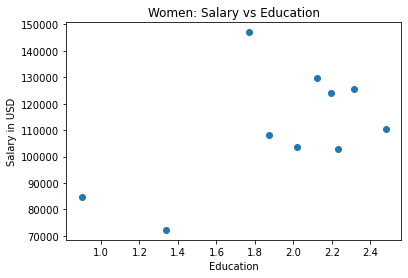

In [4]:
plt.scatter(Women_df.Formal_Education, Women_df.Salary)
plt.xlabel('Education')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs Education')
plt.show()

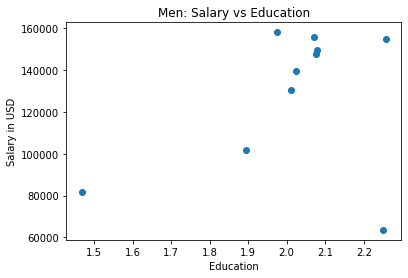

In [5]:
plt.scatter(Men_df.Formal_Education, Men_df.Salary)
plt.xlabel('Education')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs Education')
plt.show()

In [6]:
Women_X = Women_df['Formal_Education']
Men_X = Men_df['Formal_Education']

In [7]:
Women_X = Women_df.Formal_Education.values.reshape(-1, 1)
Men_X = Men_df.Formal_Education.values.reshape(-1, 1)

In [8]:
Women_y = Women_df.Salary
Men_y = Men_df.Salary

In [9]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Men_model = LinearRegression()

In [10]:
Women_model.fit(Women_X, Women_y)

LinearRegression()

In [11]:
Men_model.fit(Men_X, Men_y)

LinearRegression()

In [12]:
Women_y_pred = Women_model.predict(Women_X)
print(Women_y_pred.shape)

(10,)


In [13]:
Men_y_pred = Men_model.predict(Men_X)
print(Men_y_pred.shape)

(10,)


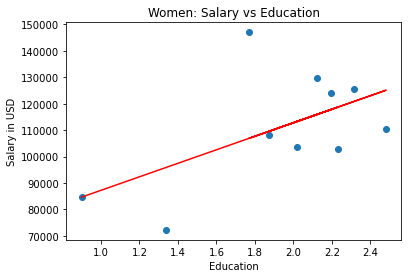

In [14]:
plt.scatter(Women_X, Women_y)
plt.plot(Women_X, Women_y_pred, color='red')
plt.xlabel('Education')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs Education')
plt.show()

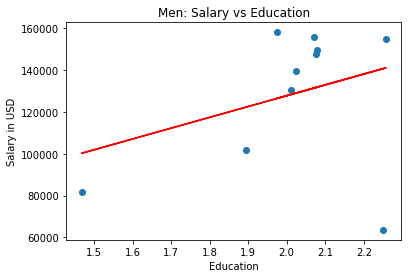

In [15]:
plt.scatter(Men_X, Men_y)
plt.plot(Men_X, Men_y_pred, color='red')
plt.xlabel('Education')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs Education')
plt.show()

In [16]:
print(Women_model.coef_)
print(Women_model.intercept_)

[25560.56587529]
61670.947088774345


In [17]:
print(Men_model.coef_)
print(Men_model.intercept_)

[51765.5107699]
24235.4733300691


In [18]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Women_X1 = sm.add_constant(Women_X)
result = sm.OLS(Women_y, Women_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.31476469966906273 0.22911028712769554


In [19]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Men_X1 = sm.add_constant(Men_X)
result = sm.OLS(Men_y, Men_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.11386161478369583 0.003094316631657823


In [20]:
import statsmodels.api as sm
Women_X_train_Sm= sm.add_constant(Women_X)
Women_train_Sm= sm.add_constant(Women_X)
ls=sm.OLS(Women_y,Women_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     3.675
Date:                Tue, 27 Jul 2021   Prob (F-statistic):             0.0915
Time:                        17:40:29   Log-Likelihood:                -111.76
No. Observations:                  10   AIC:                             227.5
Df Residuals:                       8   BIC:                             228.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.167e+04   2.64e+04      2.338      0.0